## Load cleaned datasets

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Load cleaned CSV files
benin = pd.read_csv("../data/benin_clean.csv")
sierra = pd.read_csv("../data/sierraleone_clean.csv")
togo  = pd.read_csv("../data/togo_clean.csv")

# Add country labels
benin["Country"] = "Benin"
sierra["Country"] = "Sierra Leone"
togo["Country"] = "Togo"

# Combine into one DataFrame
df_all = pd.concat([benin, sierra, togo], ignore_index=True)
df_all.head()


,Timestamp,GHI,DNI,DHI,ModA,ModB,Tamb,RH,WS,WSgust,...,WD,WDstdev,BP,Cleaning,Precipitation,TModA,TModB,Comments,Cleaning_flag,Country
0,2021-08-09 00:01,-1.2,-0.2,-1.1,0.0,0.0,26.2,93.4,0.0,0.4,...,122.1,0.0,998,0,0.0,26.3,26.2,NaN,clean,Benin
1,2021-08-09 00:02,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.6,0.0,0.0,...,0.0,0.0,998,0,0.0,26.3,26.2,NaN,clean,Benin
2,2021-08-09 00:03,-1.1,-0.2,-1.1,0.0,0.0,26.2,93.7,0.3,1.1,...,124.6,1.5,997,0,0.0,26.4,26.2,NaN,clean,Benin
3,2021-08-09 00:04,-1.1,-0.1,-1.0,0.0,0.0,26.2,93.3,0.2,0.7,...,120.3,1.3,997,0,0.0,26.4,26.3,NaN,clean,Benin
4,2021-08-09 00:05,-1.0,-0.1,-1.0,0.0,0.0,26.2,93.3,0.1,0.7,...,113.2,1.0,997,0,0.0,26.4,26.3,NaN,clean,Benin


## Compare metrics

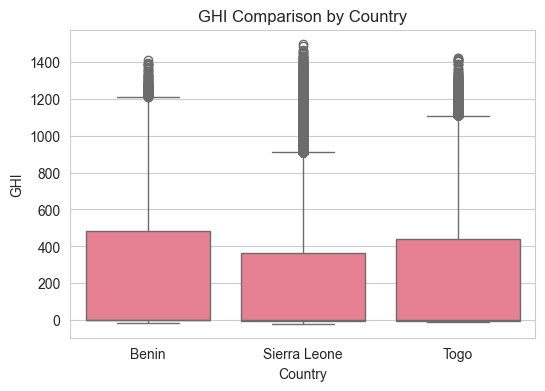

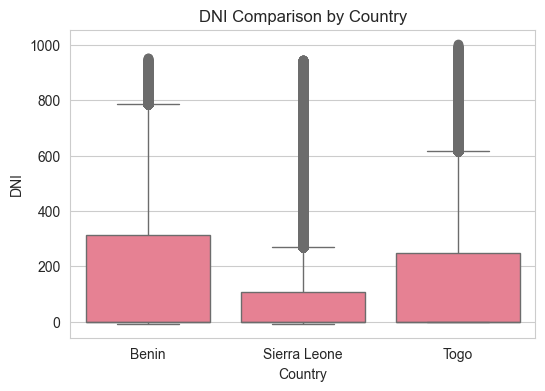

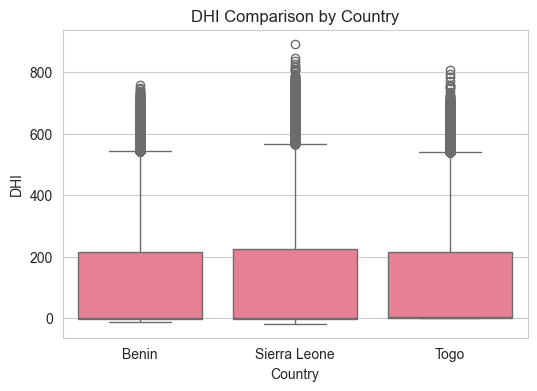

In [16]:
metrics = ["GHI", "DNI", "DHI"]

for m in metrics:
    plt.figure(figsize=(6,4))
    sns.boxplot(data=df_all, x="Country", y=m)
    plt.title(f"{m} Comparison by Country")
    plt.show()


## Summary table

In [17]:
summary = df_all.groupby("Country")[["GHI","DNI","DHI"]].agg(["mean","median","std"]).round(2)
summary


GHI                    DNI                    DHI         \
                mean median     std    mean median     std    mean median   
Country                                                                     
Benin         240.56    1.8  331.13  167.19   -0.1  261.71  115.36    1.6   
Sierra Leone  201.96    0.3  298.50  116.38   -0.1  218.65  113.72   -0.1   
Togo          230.56    2.1  322.53  151.26    0.0  250.96  116.44    2.5   

                      
                 std  
Country               
Benin         158.69  
Sierra Leone  158.95  
Togo          156.52

## Run statistical test

In [20]:
f_stat, p_val = stats.f_oneway(
    benin["GHI"].dropna(),
    sierra["GHI"].dropna(),
    togo["GHI"].dropna()
)
print("ANOVA p-value:", p_val)
## If p_val < 0.05, it means GHI differences between countries 
# are statistically significant.


ANOVA p-value: 0.0


Chart showing Avarage GHI by country

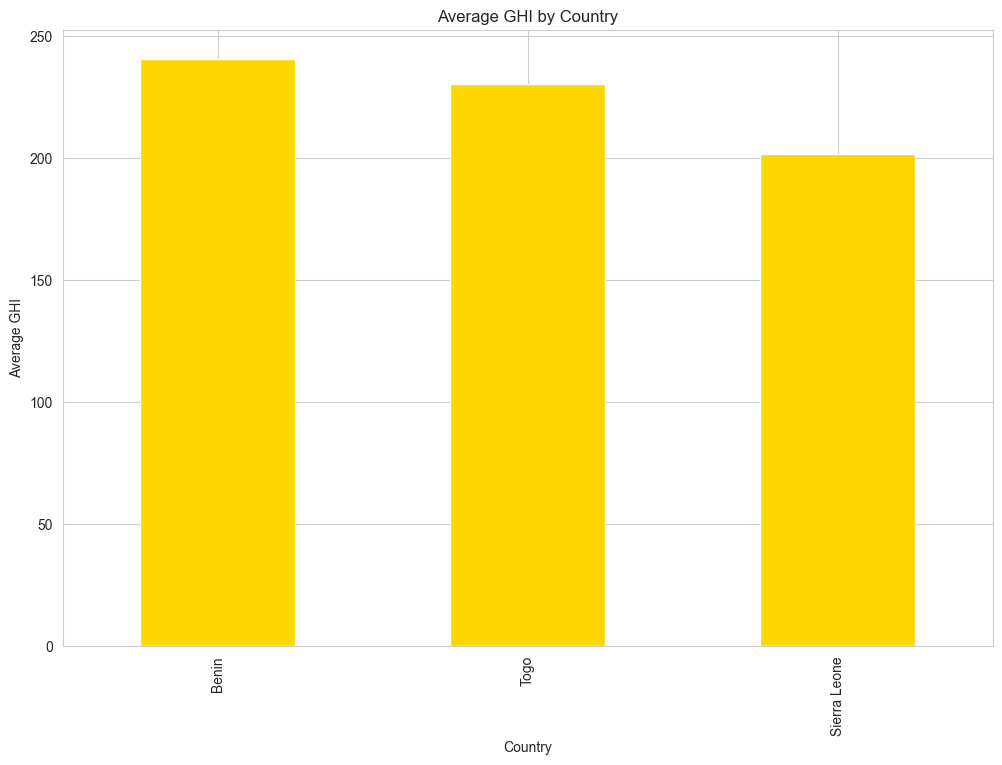

In [21]:
avg_ghi = df_all.groupby("Country")["GHI"].mean().sort_values(ascending=False)
avg_ghi.plot(kind="bar", color="gold", title="Average GHI by Country")
plt.ylabel("Average GHI")
plt.show()
